# Module 7 Final Project

```
Notebook Title: nicole_ml.ipynb
Author: Nicole Hansen
GitHub Repository: https://github.com/nhansen23/datafun-07-applied
```

In [78]:
# Import Libraries
import matplotlib as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


# Part 1 - Chart a Straight Line
```
Using 10.16 to plot Celsius vs Fahrenheit
```

### Linear Relationship: Celsius vs Fahrenheit

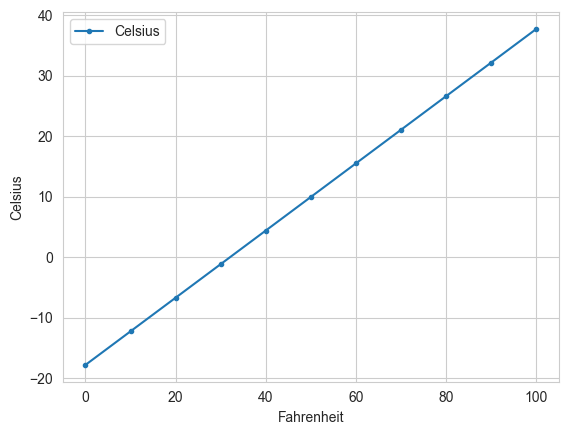

In [79]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')


# Part 2 - Predict Avg High Temp in NYC in January
```
Using 10.16 to create linear regression on Average High Temperatures in NYC in January
```

### Section 1 - Data Acquisition

In [80]:
nyc_df = pd.read_csv('ch15-practice\\ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [81]:
nyc_df.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


In [82]:
nyc_df.tail()

,Date,Temperature,Anomaly
119,2014,35.5,-1.9
120,2015,36.1,-1.3
121,2016,40.8,3.4
122,2017,42.8,5.4
123,2018,38.7,1.3


### Section 3 - Data Cleaning

In [83]:
# I do not need to update column names nor remove the last two digits on date
# as my data file was already set that way from my initial practice

# nyc_df.columns = ['Date', 'Temperature','Anomaly']

### Section 4 - Descriptive Statistics

In [84]:
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [85]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)

linear_regression.slope

0.014771361132966163

In [86]:
linear_regression.intercept

8.694993233674289

### Section 6 - Predict

In [87]:
# Predict the average high temp in January for 2019

linear_regression.slope * 2019 + linear_regression.intercept

38.51837136113297

In [88]:
# Predict the average high temp in January for 1890

linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

In [89]:
# Predict the average high temp in January for 2024

linear_regression.slope * 2024 + linear_regression.intercept

38.5922281667978

### Section 7 - Visualizations

(10.0, 70.0)

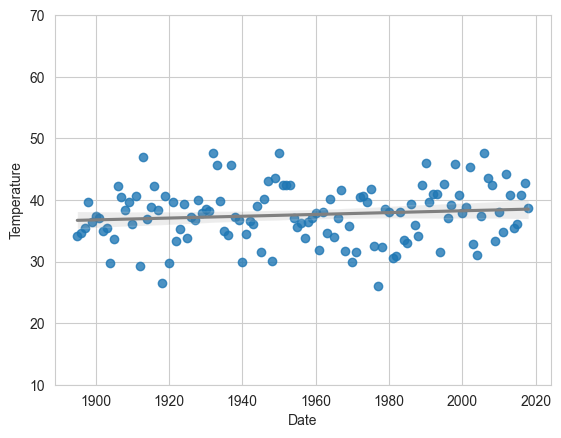

In [90]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature,  line_kws=dict(color='gray'))

axes.set_ylim(10, 70)


# Part 3 - Predict Avg High Temp in NYC in January
```
Using 15.4 to create linear regression on Average High Temperatures in NYC in January.
This section will use a different method than the previous section.
```

### Section 1 - Build the Model

In [91]:
X_train, X_test, y_train, y_test = train_test_split(
    nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values,
    random_state=11)

X_train.shape

(93, 1)

In [92]:
X_test.shape

(31, 1)

In [93]:
# Train the Model

linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)


LinearRegression()

In [94]:
linear_regression.coef_

array([0.01939167])

In [95]:
linear_regression.intercept_

-0.30779820252656975

### Section 2 - Test the Model

In [96]:
predicted = linear_regression.predict(X_test)

expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict

In [97]:
# Use the model to predict the average high temp in January for 2024

predict = (lambda x: linear_regression.coef_ * x +
                     linear_regression.intercept_)

predict(2024)

array([38.94094855])

### Section 3 - Visualizations

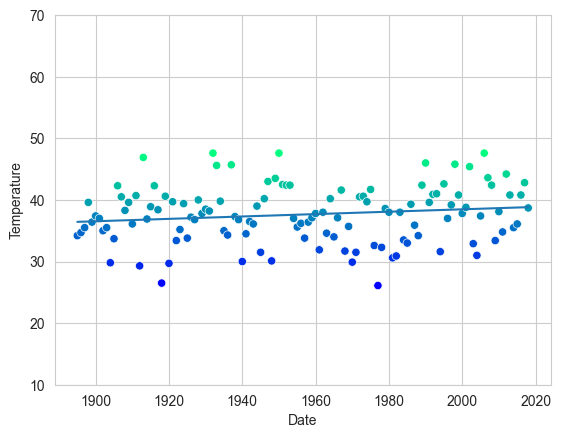

In [98]:
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature',
                       hue='Temperature', palette='winter',legend=False)

axes.set_ylim(10, 70)

x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)

line = plt.plot(x, y)

# Part 4 - Comparing Methods